In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import hdbscan

In [27]:
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [126]:
embedding_size = 100
embeddings = pd.read_csv('word2vec_preprocessed_embeddings/embedding_%d.csv' % embedding_size, sep='\t', header=None, dtype=float)
labels = pd.read_csv('word2vec_preprocessed_embeddings/labels_%d.csv' % embedding_size, sep='\t', header=None, dtype=str, names=['action_label'])

In [140]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True)

In [141]:
clusterer.fit(embeddings)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=3, min_samples=None, p=None,
    prediction_data=False)

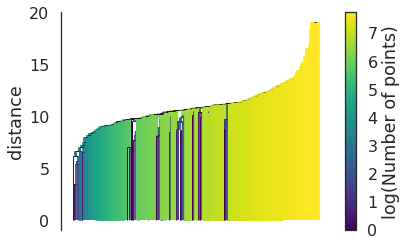

In [142]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
plt.show()

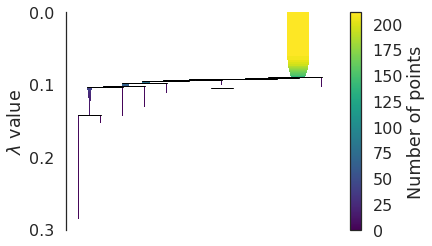

In [143]:
clusterer.condensed_tree_.plot()
plt.show()

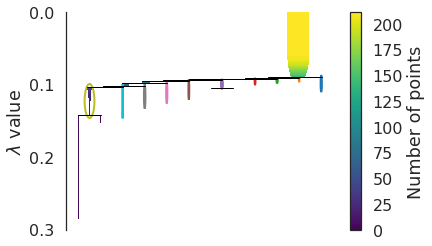

In [144]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

In [151]:
def plot_clusters(df):
    palette = sns.color_palette()
    cluster_colors = [sns.desaturate(palette[col], sat)
                      if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                      zip(clusterer.labels_, clusterer.probabilities_)]
    plt.scatter(df['x'], df['y'], c=cluster_colors, **plot_kwds)
    plt.show()

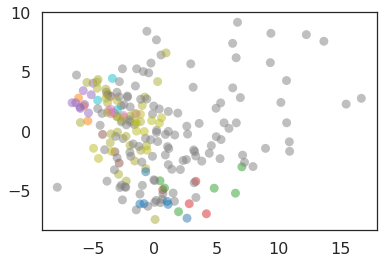

In [152]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pc = pca.fit_transform(embeddings)
pc = pd.DataFrame(data = pc, columns = ['x', 'y'])
plot_clusters(df)

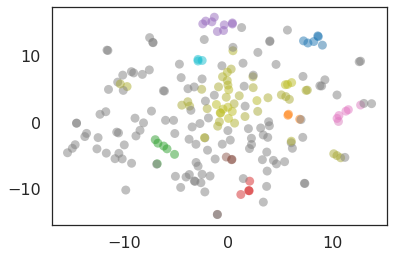

In [154]:
from sklearn.manifold import TSNE

tsne_data = TSNE(n_components=2).fit_transform(embeddings)
tsne_data = pd.DataFrame(data = tsne_data, columns = ['x', 'y'])
plot_clusters(tsne_data)

In [147]:
labels['cluster_labels'] = clusterer.labels_
labels['cluster_prob'] = clusterer.probabilities_
for i, row in labels.groupby('cluster_labels'):
    print(row.sort_values(by=['cluster_prob'], ascending=False))

                            action_label  cluster_labels  cluster_prob
1                      click_on_sim_card              -1           0.0
118           click_on_subscription_type              -1           0.0
145                  click_on_add_dealer              -1           0.0
143                    click_on_homepage              -1           0.0
142                      change_language              -1           0.0
141             scroll_on_page_downloads              -1           0.0
140        click_on_terms_and_conditions              -1           0.0
138                       click_on_trash              -1           0.0
135               click_on_cloud_product              -1           0.0
132  click_new_subscription_from_scratch              -1           0.0
128                      click_on_change              -1           0.0
122                   click_on_user_type              -1           0.0
121                    add_new_agreement              -1           0.0
119   